In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:ylabel='Frequency'>

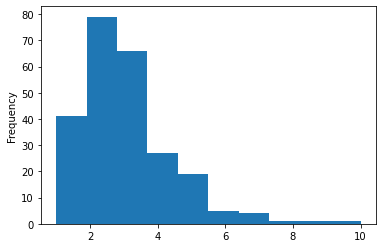

In [8]:
tips.tip.plot(kind='hist')

<AxesSubplot:>

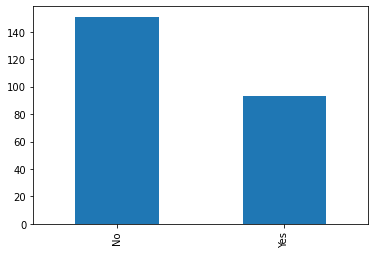

In [12]:
#using matplot
tips.smoker.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='smoker', ylabel='count'>

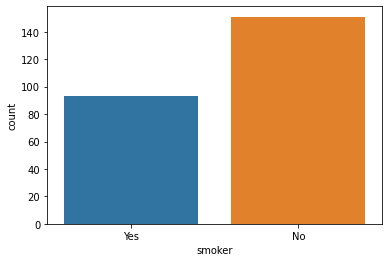

In [13]:
#using seaborn
sns.countplot(x='smoker', data=tips)

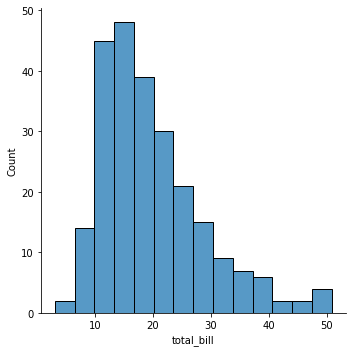

In [15]:
sns.displot(tips.total_bill)

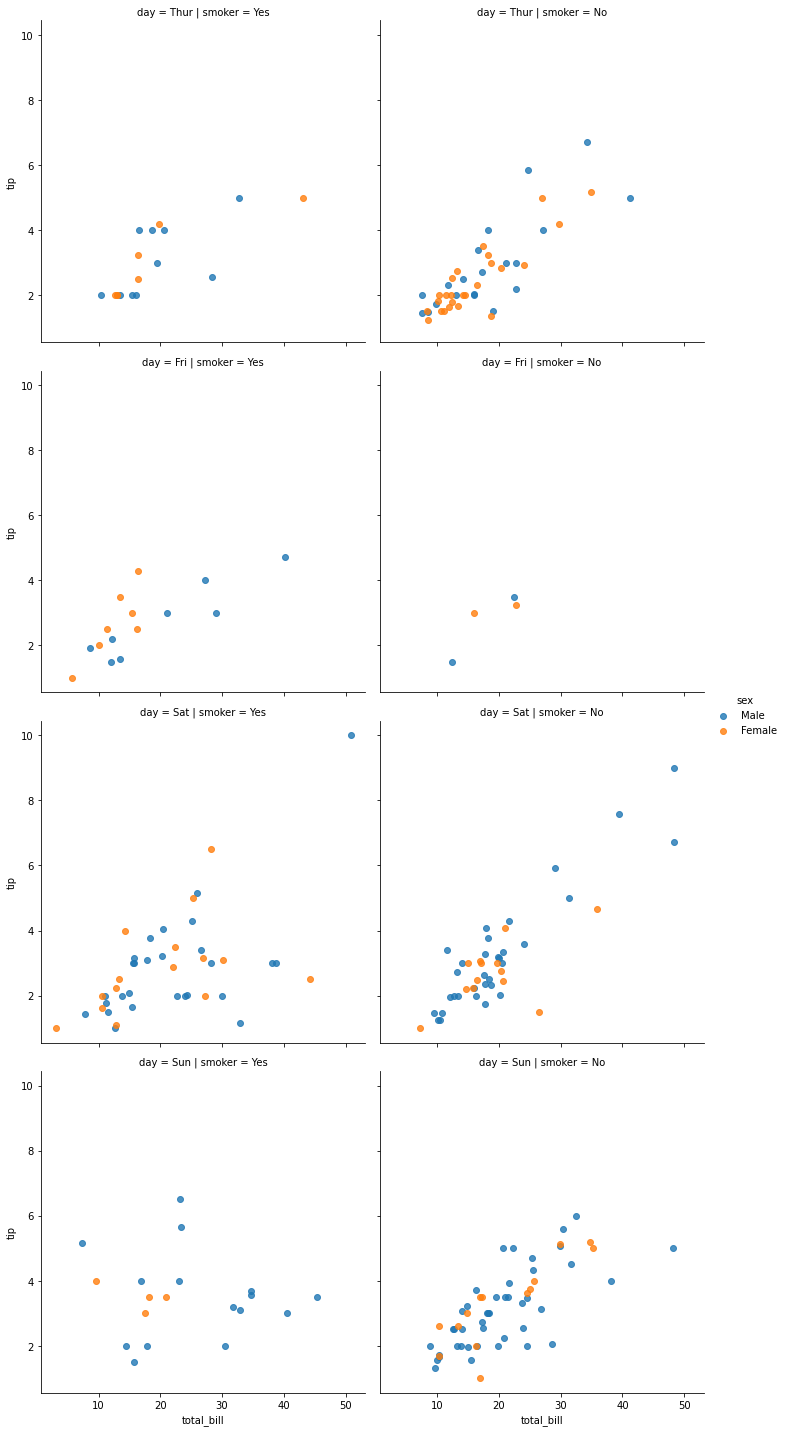

In [21]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex',
          fit_reg=False, col='smoker', row='day')

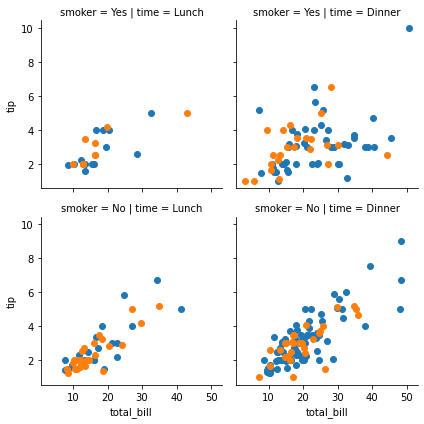

In [24]:
#sns won't have coloring and other features in all plots but using facet allows to create 

facet = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

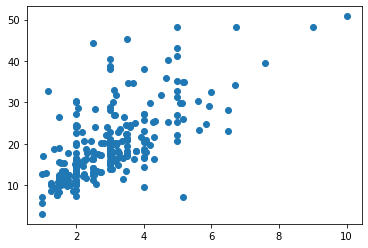

In [30]:
#creating two diff plots that don't have similarties in one figure using matplot
fig, (ax) = plt.subplots(1, 1) #1 row 1 col
ax.scatter(tips.tip, tips.total_bill)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

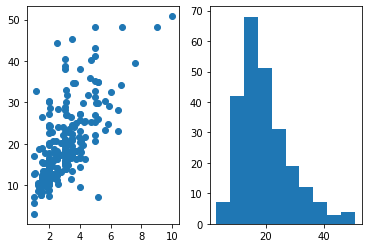

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2) 
ax1.scatter(tips.tip, tips.total_bill)
ax2.hist(tips.total_bill)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

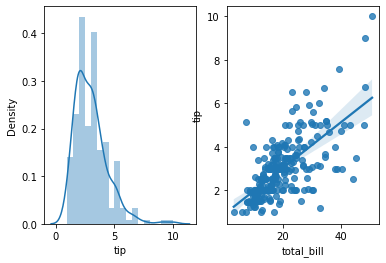

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(tips.tip, ax=ax1)
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax2)

# Exercise

In [42]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='fare'>

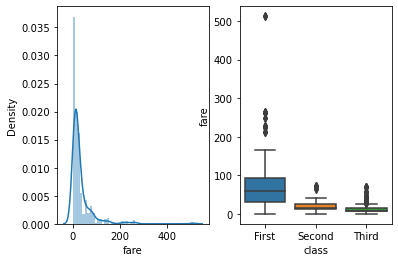

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(titanic.fare, ax=ax1)
sns.boxplot(x='class', y='fare', data=titanic, ax=ax2)

# Modeling

In [48]:
from sklearn import linear_model

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [50]:
#create a model object
lr = linear_model.LinearRegression()

In [51]:
lr.fit(X=tips[['total_bill', 'size']], y=tips['tip'])

LinearRegression()

In [52]:
lr.coef_

#for every $1 increase in total bill given the size is same, the tip increases
#by 9 cents [0.09271334].
#for every 1 person increase in size assuming the total bill is same, the tip
#increases by 19 cents [0.19259779]

array([0.09271334, 0.19259779])

In [53]:
lr.intercept_

0.6689447408125022

encode categorical values to number

In [55]:
pd.get_dummies(tips) #this will convert categoricals cols to numeric

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [58]:
#since there are extra cols that define if it is yes or no which could be
#concluded to fewer cols
#sex_Male is dropped. if sex_Female is 1 its F and if its 0 then its Male
#smoker_yes is dropped. if smoker_no is 1 then none smoker if 0 smoker
#day_Thurs is dropped. if all these days are 0 then its thursday 
#time_lunch is dropped. if its 1 then its dinner and not lunch
tips_dummy = pd.get_dummies(tips, drop_first=True)
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [59]:
lr = linear_model.LinearRegression()
lr.fit(X=tips_dummy.iloc[:, 2:], y=tips_dummy['tip']) #2: all cols after size

LinearRegression()

In [60]:
lr.coef_

array([ 0.71001644, -0.10057881, -0.20916402, -0.20180568, -0.36603136,
       -0.29452609,  0.48575489])

Interpretation: 
    
    time_Dinner [0.48575489]: if a person is having dinner than a lunch
    tip is going to increase about 49 cents assuming everything else is same
    